In [86]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from scipy.stats import linregress
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# define paths for the datasets to be used
path_rental = "Resources/Average Rents_Concat.csv"
path_units = "Resources/Number_of_Units_Concat.csv"
path_vacancy = "Resources/Vacancy Rate Concat.csv"

#read into files
rental_df = pd.read_csv(path_rental)
units_df = pd.read_csv(path_units)
vacancy_df = pd.read_csv(path_vacancy)


In [87]:
#read the columns
rental_df.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [88]:
vacancy_df.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +', 'Total ', 'Year'],
      dtype='object')

In [89]:
#merge dtataframes
merged_df = pd.merge(rental_df, vacancy_df, on = ["Province", "Centre","Zone","Neighbourhood","Dwelling Type ","Year"],how = 'left',suffixes =(" Average Rents", "Vacancy Rate") )

In [90]:
merged_df

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor Average Rents,1 Bedroom Average Rents,2 Bedroom Average Rents,3 Bedroom + Average Rents,Total Average Rents,Year,Bachelor Vacancy Rate,1 BedroomVacancy Rate,2 BedroomVacancy Rate,3 Bedroom +Vacancy Rate,Total Vacancy Rate
0,Nfld.Lab.,St. John's,St. John's East,St. John's East,Row,0.0,783.0,943.0,0.0,1166.0,2018,0.0,0.0,0.0,0.0,0.0
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,664.0,829.0,1049.0,1002.0,941.0,2018,0.0,3.9,6.4,5.2,5.6
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,743.0,0.0,576.0,2018,0.0,0.0,0.0,0.0,1.5
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,762.0,773.0,881.0,959.0,839.0,2018,3.9,6.1,6.1,0.0,6.2
4,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Row,0.0,0.0,0.0,0.0,0.0,2018,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,B.C.,Victoria,Oak Bay,Oak Bay North,Apt & Other,1107.0,1226.0,1679.0,0.0,1405.0,2022,0.0,0.2,1.1,0.0,0.7
8946,B.C.,Victoria,North Saanich,North Saanich,Row,0.0,0.0,0.0,0.0,0.0,2022,0.0,0.0,0.0,0.0,0.0
8947,B.C.,Victoria,North Saanich,North Saanich,Apt & Other,0.0,0.0,0.0,0.0,0.0,2022,0.0,0.0,0.0,0.0,0.0
8948,B.C.,Victoria,Sidney,Sidney,Row,0.0,0.0,0.0,0.0,0.0,2022,0.0,0.0,0.0,0.0,0.0


In [91]:
#display columns to avoid errors while naming 
merged_df.columns

Index(['Province', 'Centre', 'Zone', 'Neighbourhood', 'Dwelling Type ',
       'Bachelor  Average Rents', '1 Bedroom Average Rents',
       '2 Bedroom Average Rents', '3 Bedroom + Average Rents',
       'Total  Average Rents', 'Year', 'Bachelor Vacancy Rate',
       '1 BedroomVacancy Rate', '2 BedroomVacancy Rate',
       '3 Bedroom +Vacancy Rate', 'Total Vacancy Rate'],
      dtype='object')

In [92]:
#extraxct what you need
merged_data = merged_df.loc[(merged_df['Total  Average Rents']!=0) & (merged_df['Total Vacancy Rate']!=0)]

In [93]:
merged_data

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor Average Rents,1 Bedroom Average Rents,2 Bedroom Average Rents,3 Bedroom + Average Rents,Total Average Rents,Year,Bachelor Vacancy Rate,1 BedroomVacancy Rate,2 BedroomVacancy Rate,3 Bedroom +Vacancy Rate,Total Vacancy Rate
1,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,664.0,829.0,1049.0,1002.0,941.0,2018,0.0,3.9,6.4,5.2,5.6
2,Nfld.Lab.,St. John's,St. John's West,St. John's West,Row,0.0,0.0,743.0,0.0,576.0,2018,0.0,0.0,0.0,0.0,1.5
3,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,762.0,773.0,881.0,959.0,839.0,2018,3.9,6.1,6.1,0.0,6.2
7,N.S.,Halifax,Peninsula South,Downtown Halifax,Apt & Other,978.0,1202.0,1774.0,2099.0,1436.0,2018,0.7,1.1,1.1,1.4,1.1
9,N.S.,Halifax,Peninsula South,South End,Apt & Other,856.0,1120.0,1515.0,1852.0,1197.0,2018,1.2,0.8,1.4,1.2,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,B.C.,Victoria,Esquimalt,Esquimalt,Apt & Other,1044.0,1269.0,1403.0,1799.0,1327.0,2022,2.7,1.1,1.2,0.0,1.2
8935,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,View Royal,Apt & Other,1534.0,1522.0,1858.0,2476.0,1822.0,2022,0.0,0.0,0.9,8.3,1.1
8937,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,Langford,Apt & Other,1364.0,1592.0,1915.0,2197.0,1756.0,2022,2.0,1.5,1.8,1.3,1.7
8939,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,Colwood,Apt & Other,0.0,1226.0,1495.0,0.0,1365.0,2022,0.0,0.0,0.0,0.0,0.8


In [94]:
#extract the year
data_2022 = merged_data.loc[(merged_data['Year']==2022)]

In [95]:
data_2022

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor Average Rents,1 Bedroom Average Rents,2 Bedroom Average Rents,3 Bedroom + Average Rents,Total Average Rents,Year,Bachelor Vacancy Rate,1 BedroomVacancy Rate,2 BedroomVacancy Rate,3 Bedroom +Vacancy Rate,Total Vacancy Rate
7161,Nfld.Lab.,St. John's,St. John's East,St. John's East,Apt & Other,727.0,933.0,1111.0,1056.0,1009.0,2022,4.5,3.6,2.5,0.0,3.2
7163,Nfld.Lab.,St. John's,St. John's West,St. John's West,Apt & Other,842.0,792.0,955.0,1048.0,901.0,2022,7.4,2.8,0.9,3.0,2.5
7165,Nfld.Lab.,St. John's,Remainder of CMA,Remainder of CMA,Apt & Other,0.0,733.0,931.0,791.0,830.0,2022,0.0,3.7,0.0,0.0,2.9
7167,N.S.,Halifax,Peninsula South,Downtown Halifax,Apt & Other,1187.0,1499.0,2188.0,2437.0,1746.0,2022,1.9,0.9,0.6,0.0,0.8
7169,N.S.,Halifax,Peninsula South,South End,Apt & Other,1021.0,1338.0,1692.0,2018.0,1381.0,2022,0.6,0.4,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,B.C.,Victoria,Esquimalt,Esquimalt,Apt & Other,1044.0,1269.0,1403.0,1799.0,1327.0,2022,2.7,1.1,1.2,0.0,1.2
8935,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,View Royal,Apt & Other,1534.0,1522.0,1858.0,2476.0,1822.0,2022,0.0,0.0,0.9,8.3,1.1
8937,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,Langford,Apt & Other,1364.0,1592.0,1915.0,2197.0,1756.0,2022,2.0,1.5,1.8,1.3,1.7
8939,B.C.,Victoria,Langford/Vw Royal/Colwood/Sooke,Colwood,Apt & Other,0.0,1226.0,1495.0,0.0,1365.0,2022,0.0,0.0,0.0,0.0,0.8


In [96]:
data_2022["Total Vacancy Rate"].max()

11.2

In [97]:
#extract data for Ontario
data_2022_Ontario = data_2022[(data_2022["Province"]=="Ont.")]
data_2022_Ontario

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor Average Rents,1 Bedroom Average Rents,2 Bedroom Average Rents,3 Bedroom + Average Rents,Total Average Rents,Year,Bachelor Vacancy Rate,1 BedroomVacancy Rate,2 BedroomVacancy Rate,3 Bedroom +Vacancy Rate,Total Vacancy Rate
7669,Ont.,Barrie,Barrie,Downtown,Apt & Other,1067.0,1294.0,1571.0,1516.0,1412.0,2022,6.2,3.2,2.2,0.0,2.9
7671,Ont.,Barrie,Barrie,West End,Apt & Other,0.0,0.0,1399.0,0.0,1422.0,2022,0.0,0.0,2.0,0.0,2.3
7673,Ont.,Barrie,Barrie,North Barrie,Apt & Other,0.0,1341.0,1516.0,0.0,1423.0,2022,0.0,2.5,0.5,0.0,1.5
7675,Ont.,Barrie,Barrie,East End,Apt & Other,0.0,1311.0,1464.0,0.0,1398.0,2022,0.0,0.9,0.3,0.0,0.6
7676,Ont.,Barrie,Barrie,South Barrie,Row,0.0,0.0,0.0,1939.0,1861.0,2022,0.0,0.0,0.0,2.9,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,Ont.,Windsor,East Outer,Fontainebleau,Apt & Other,1044.0,1151.0,1267.0,1426.0,1242.0,2022,0.0,0.0,0.0,0.0,3.6
8353,Ont.,Windsor,West,University,Apt & Other,742.0,955.0,1080.0,1077.0,984.0,2022,0.0,0.0,0.0,0.0,1.1
8355,Ont.,Windsor,West,Sandwich,Apt & Other,795.0,962.0,1103.0,0.0,1017.0,2022,0.0,1.7,2.4,0.0,1.8
8357,Ont.,Windsor,West,Southwest Windsor,Apt & Other,0.0,0.0,1101.0,0.0,1056.0,2022,0.0,0.0,0.0,0.0,0.5


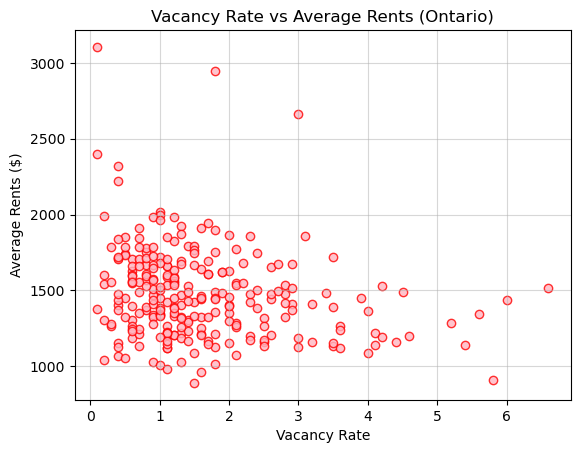

In [98]:
# get scatter plot
plt.scatter(data_2022_Ontario["Total Vacancy Rate"],data_2022_Ontario[['Total  Average Rents']], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
# Incorporate the other graph properties
plt.title("Vacancy Rate vs Average Rents (Ontario)")
plt.xlabel("Vacancy Rate")
plt.ylabel("Average Rents ($)")
plt.grid(linestyle="-",alpha = 0.5)
# Save the figure
plt.savefig("Vacancy Rate vs Average Rents (Ontario)Scatter plots.png")

# Show plot
plt.show()

In [99]:
#get centre name 
data_2022_Ontario["Centre"].unique()

array(['Barrie', 'Belleville', 'Brantford', 'Guelph', 'Hamilton',
       'Kingston', 'Kitchener - Cambridge - Waterl', 'London',
       'St. Catharines - Niagara', 'Oshawa', 'Ottawa', 'Peterborough',
       'Greater Sudbury / Grand Sudbur', 'Thunder Bay', 'Toronto',
       'Windsor'], dtype=object)

In [100]:
#extract Toronto
df_2022_Toronto = data_2022_Ontario[(data_2022_Ontario["Centre"] == "Toronto")]

In [101]:
df_2022_Toronto

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor Average Rents,1 Bedroom Average Rents,2 Bedroom Average Rents,3 Bedroom + Average Rents,Total Average Rents,Year,Bachelor Vacancy Rate,1 BedroomVacancy Rate,2 BedroomVacancy Rate,3 Bedroom +Vacancy Rate,Total Vacancy Rate
8069,Ont.,Toronto,Toronto (Central),Cabbagetown-S. St. James Town,Apt & Other,1374.0,1593.0,2126.0,0.0,1654.0,2022,1.1,2.4,0.0,0.0,2.6
8071,Ont.,Toronto,Toronto (Central),North St. James Town,Apt & Other,1376.0,1676.0,2003.0,2266.0,1743.0,2022,1.2,0.5,0.2,0.0,0.5
8073,Ont.,Toronto,Toronto (Central),Church-Yonge Corridor,Apt & Other,1486.0,1693.0,2201.0,3219.0,1721.0,2022,5.1,3.3,1.2,0.0,3.5
8075,Ont.,Toronto,Toronto (Central),Bay Street Corridor,Apt & Other,1717.0,2356.0,3548.0,0.0,2662.0,2022,2.2,3.8,2.5,0.0,3.0
8079,Ont.,Toronto,Toronto (Central),University/Annex,Apt & Other,1581.0,1758.0,2391.0,3477.0,1912.0,2022,0.8,2.1,0.8,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323,Ont.,Toronto,Pickering/Ajax/Uxbridge,Ajax/Pickering,Apt & Other,0.0,1193.0,1533.0,1608.0,1556.0,2022,0.0,0.0,0.3,0.3,0.3
8325,Ont.,Toronto,Pickering/Ajax/Uxbridge,Uxbridge,Apt & Other,0.0,1389.0,1575.0,0.0,1455.0,2022,0.0,0.0,0.0,0.0,2.0
8327,Ont.,Toronto,Milton/Halton Hills,Milton/Halton Hills,Apt & Other,911.0,1309.0,1523.0,1791.0,1444.0,2022,0.0,2.0,1.7,1.4,1.8
8329,Ont.,Toronto,Orangeville/Mono,Orangeville/Mono,Apt & Other,0.0,1269.0,1455.0,1588.0,1372.0,2022,0.0,0.6,0.3,0.0,0.4


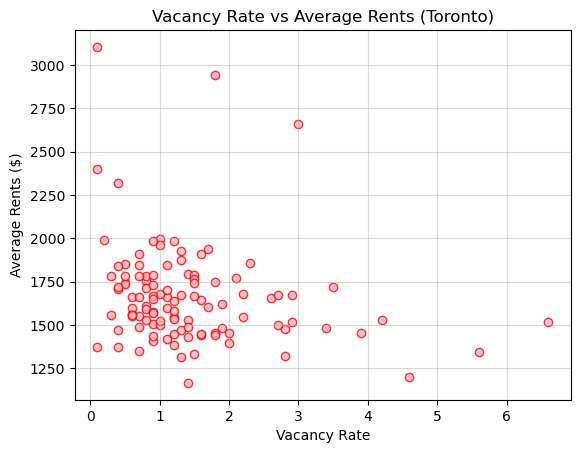

In [102]:
plt.scatter(df_2022_Toronto["Total Vacancy Rate"],df_2022_Toronto[['Total  Average Rents']], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
# Incorporate the other graph properties
plt.title("Vacancy Rate vs Average Rents (Toronto)")
plt.xlabel("Vacancy Rate")
plt.ylabel("Average Rents ($)")
plt.grid(linestyle="-",alpha = 0.5)
# Save the figure
plt.savefig("Vacancy Rate vs Average Rents (Toronto) Scatter.png")

# Show plot
plt.show()

In [103]:
#get names for zones
df_2022_Toronto["Zone"].unique()

array(['Toronto (Central)', 'Toronto (East)', 'Toronto (North)',
       'Toronto (West)', 'Etobicoke (South)', 'Etobicoke (Central)',
       'Etobicoke (North)', 'York', 'East York', 'Scarborough (Central)',
       'Scarborough (North)', 'Scarborough (East)',
       'North York (Southeast)', 'North York (Northeast)',
       'North York (Southwest)', 'North York (N.Central)',
       'North York (Northwest)', 'Mississauga (South)',
       'Mississauga (Northwest)', 'Mississauga (Northeast)',
       'Brampton (West)', 'Brampton (East)', 'Oakville',
       'Richmond Hill/Vaughan/King', 'Aurora, Newmkt, Whit-St.',
       'Markham', 'Pickering/Ajax/Uxbridge', 'Milton/Halton Hills',
       'Orangeville/Mono', 'Bradford/West Gwillimbury/New Tecumseth'],
      dtype=object)

In [104]:
#extract Central Toronto

df_2022_Central_Toronto = df_2022_Toronto[(df_2022_Toronto["Zone"]=='Toronto (Central)')|\
                                          ( df_2022_Toronto["Zone"]=='Toronto (East)')|\
                                          (df_2022_Toronto["Zone"]=='Toronto (North)')|\
                                          (df_2022_Toronto["Zone"]=='Toronto (West)')]

In [105]:
df_2022_Central_Toronto

,Province,Centre,Zone,Neighbourhood,Dwelling Type,Bachelor Average Rents,1 Bedroom Average Rents,2 Bedroom Average Rents,3 Bedroom + Average Rents,Total Average Rents,Year,Bachelor Vacancy Rate,1 BedroomVacancy Rate,2 BedroomVacancy Rate,3 Bedroom +Vacancy Rate,Total Vacancy Rate
8069,Ont.,Toronto,Toronto (Central),Cabbagetown-S. St. James Town,Apt & Other,1374.0,1593.0,2126.0,0.0,1654.0,2022,1.1,2.4,0.0,0.0,2.6
8071,Ont.,Toronto,Toronto (Central),North St. James Town,Apt & Other,1376.0,1676.0,2003.0,2266.0,1743.0,2022,1.2,0.5,0.2,0.0,0.5
8073,Ont.,Toronto,Toronto (Central),Church-Yonge Corridor,Apt & Other,1486.0,1693.0,2201.0,3219.0,1721.0,2022,5.1,3.3,1.2,0.0,3.5
8075,Ont.,Toronto,Toronto (Central),Bay Street Corridor,Apt & Other,1717.0,2356.0,3548.0,0.0,2662.0,2022,2.2,3.8,2.5,0.0,3.0
8079,Ont.,Toronto,Toronto (Central),University/Annex,Apt & Other,1581.0,1758.0,2391.0,3477.0,1912.0,2022,0.8,2.1,0.8,0.0,1.6
8081,Ont.,Toronto,Toronto (Central),Rosedale,Apt & Other,0.0,1957.0,0.0,0.0,2400.0,2022,0.0,0.0,0.2,0.0,0.1
8083,Ont.,Toronto,Toronto (East),Riverdale,Apt & Other,1236.0,1514.0,2016.0,0.0,1642.0,2022,0.0,2.3,1.2,0.0,1.6
8087,Ont.,Toronto,Toronto (East),East End-Danforth,Apt & Other,1237.0,1473.0,1650.0,0.0,1518.0,2022,10.0,6.5,5.7,0.0,6.6
8091,Ont.,Toronto,Toronto (East),Playter Estates-Danforth,Apt & Other,1149.0,1419.0,1798.0,0.0,1485.0,2022,0.0,0.0,0.0,0.0,3.4
8095,Ont.,Toronto,Toronto (North),Yonge-St. Clair,Apt & Other,1560.0,1828.0,2234.0,2722.0,1925.0,2022,1.5,1.5,0.9,0.0,1.3


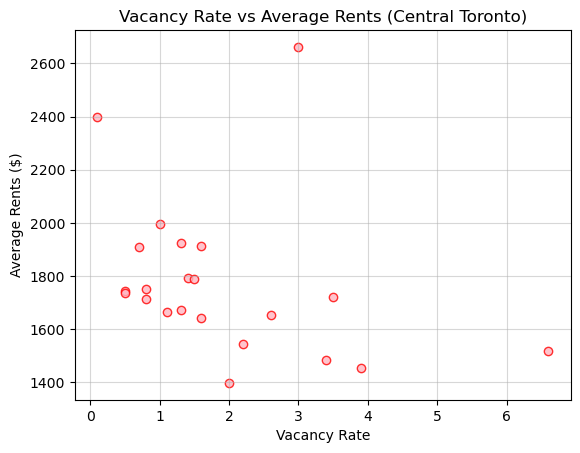

In [106]:
plt.scatter(df_2022_Central_Toronto["Total Vacancy Rate"],df_2022_Central_Toronto[['Total  Average Rents']], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
# Incorporate the other graph properties
plt.title("Vacancy Rate vs Average Rents (Central Toronto)")
plt.xlabel("Vacancy Rate")
plt.ylabel("Average Rents ($)")
plt.grid(linestyle="-",alpha = 0.5)
# Save the figure
plt.savefig("Vacancy Rate vs Average Rents (Central Toronto)Scatter.png")

# Show plot
plt.show()

In [107]:
#define function for linear regression and annotation
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderrr) = linregress(x,y)
    print(f"r-squared value is {round(st.pearsonr(x,y)[0],2)}")
    regress_values = round(slope,2) * x + round(intercept,2)
    equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
    plt.plot(x, regress_values, color='red')
    return equation
def annotation(equation, x_value,y_value):
     plt.annotate(equation,(x_value,y_value), color='black')    

r-squared value is -0.22


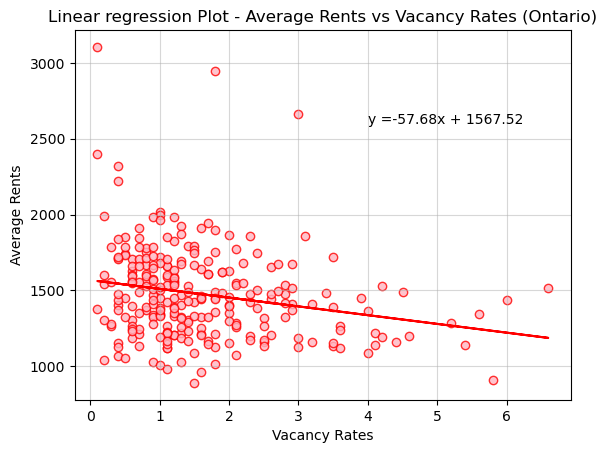

In [111]:
#get fit line for all the previous plots
line_equation = linear_regression(data_2022_Ontario["Total Vacancy Rate"],data_2022_Ontario['Total  Average Rents'])
annotation(line_equation,4,2600)
plt.title("Linear regression Plot - Average Rents vs Vacancy Rates (Ontario)")
plt.xlabel("Vacancy Rates")
plt.ylabel("Average Rents")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("Linear regression Plot -  Average Rents vs Vacancy Rates (Ontario).png")


r-squared value is -0.21


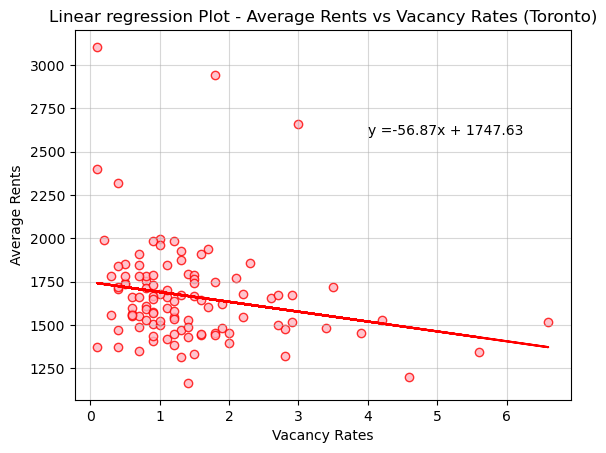

In [112]:
line_equation = linear_regression(df_2022_Toronto["Total Vacancy Rate"],df_2022_Toronto['Total  Average Rents'])
annotation(line_equation,4,2600)
plt.title("Linear regression Plot - Average Rents vs Vacancy Rates (Toronto)")
plt.xlabel("Vacancy Rates")
plt.ylabel("Average Rents")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("Linear regression Plot -  Average Rents vs Vacancy Rates (Toronto).png")

r-squared value is -0.31


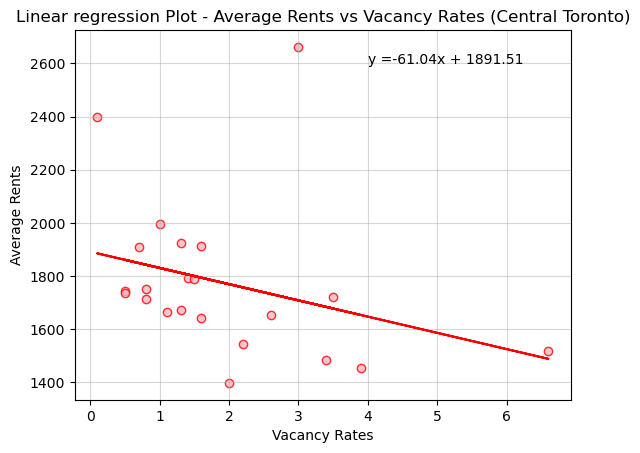

In [113]:
line_equation = linear_regression(df_2022_Central_Toronto["Total Vacancy Rate"],df_2022_Central_Toronto['Total  Average Rents'])
annotation(line_equation,4,2600)
plt.title("Linear regression Plot - Average Rents vs Vacancy Rates (Central Toronto)")
plt.xlabel("Vacancy Rates")
plt.ylabel("Average Rents")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("Linear regression Plot -  Average Rents vs Vacancy Rates ( Central Toronto).png")